In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from optical_flow import OpticalFlow, parse_args

In [2]:
def load_frames_from_images(images):
    img1 = cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(images[1]), cv2.COLOR_BGR2RGB)
    
    return img1, img2

def load_frames_from_video(video, skip_frames):
    cap = cv2.VideoCapture(video)
    idx = 0
    
    while idx < skip_frames:
        ret = cap.grab()
        idx += 1

    ret, img1 = cap.read()
    ret, tmp = cap.read()
    ret, img2 = cap.read()

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    cap.release()
    
    return img1, img2

In [3]:
def run_optical_flow(img1, img2, model_name, model_weights):
    args = parse_args(model_name)
    args.optical_weights = '/mnt/disks/datastorage/weights/{}.pth.tar'.format(model_weights)

    of = OpticalFlow(args)
    output = of.run([img1, img2])
    
    output = output.transpose(1, 2, 0)
    of.display_flow(output)

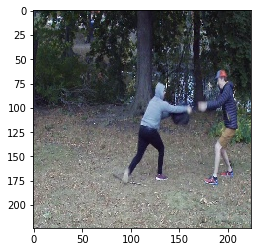

In [4]:
images = [
    '/mnt/disks/datastorage/videos/rgb/v_Theft_g16_c000004/frame000010.jpg',
    '/mnt/disks/datastorage/videos/rgb/v_Theft_g16_c000004/frame000011.jpg'
]

img_frame1, img_frame2 = load_frames_from_images(images)

plt.imshow(img_frame1)

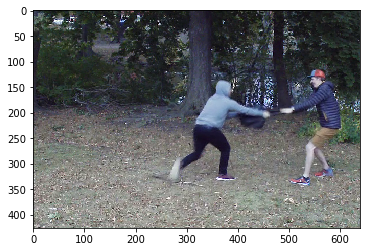

In [5]:
video = '/mnt/disks/datastorage/videos/elp/theft/v_Theft_g16_v1_b.mov'
skip_frames = 503

vid_frame1, vid_frame2 = load_frames_from_video(video, skip_frames)

plt.imshow(vid_frame1)

Parsing Arguments
  [0.007s] fp16: False
  [0.007s] fp16_scale: 1024.0
  [0.007s] inference_size: [-1, -1]
  [0.007s] loss: L1Loss
  [0.007s] model: FlowNet2CSS
  [0.007s] model_batchNorm: False
  [0.007s] model_div_flow: 20.0
  [0.007s] number_gpus: 1
  [0.007s] optical_weights: 
  [0.007s] rgb_max: 255.0
  [0.007s] seed: 1
  [0.008s] Operation finished

Building FlowNet2CSS model


/home/mlp/LENS/flownet2-pytorch/models.py:460: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  init.uniform(m.bias)
/home/mlp/LENS/flownet2-pytorch/models.py:461: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(m.weight)
/home/mlp/LENS/flownet2-pytorch/models.py:465: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  init.uniform(m.bias)
/home/mlp/LENS/flownet2-pytorch/models.py:466: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(m.weight)


  [2.913s] Number of parameters: 116565942
  [2.914s] Initializing CUDA
  [5.509s] Parallelizing
  [5.512s] Loading weights /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar
  [5.989s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar (at epoch 0)
  [5.990s] Operation finished



/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


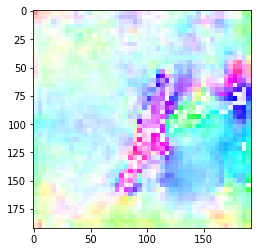

Parsing Arguments
  [0.000s] fp16: False
  [0.000s] fp16_scale: 1024.0
  [0.000s] inference_size: [-1, -1]
  [0.000s] loss: L1Loss
  [0.000s] model: FlowNet2
  [0.000s] model_batchNorm: False
  [0.000s] model_div_flow: 20.0
  [0.000s] number_gpus: 1
  [0.001s] optical_weights: 
  [0.001s] rgb_max: 255.0
  [0.001s] seed: 1
  [0.001s] Operation finished

Building FlowNet2 model
  [3.959s] Number of parameters: 162518834
  [3.959s] Initializing CUDA
  [4.112s] Parallelizing
  [4.116s] Loading weights /mnt/disks/datastorage/weights/FlowNet2.pth.tar
  [4.680s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2.pth.tar (at epoch 0)
  [4.681s] Operation finished



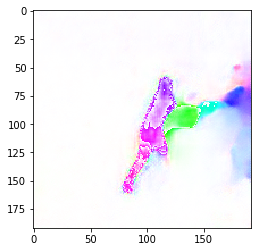

In [6]:
run_optical_flow(img_frame1, img_frame2, 'FlowNet2CSS', 'FlowNet2-CSS')
run_optical_flow(img_frame1, img_frame2, 'FlowNet2', 'FlowNet2')

Parsing Arguments
  [0.000s] fp16: False
  [0.000s] fp16_scale: 1024.0
  [0.000s] inference_size: [-1, -1]
  [0.000s] loss: L1Loss
  [0.000s] model: FlowNet2CSS
  [0.000s] model_batchNorm: False
  [0.001s] model_div_flow: 20.0
  [0.001s] number_gpus: 1
  [0.001s] optical_weights: 
  [0.001s] rgb_max: 255.0
  [0.001s] seed: 1
  [0.001s] Operation finished

Building FlowNet2CSS model
  [2.787s] Number of parameters: 116565942
  [2.787s] Initializing CUDA
  [2.891s] Parallelizing
  [2.894s] Loading weights /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar
  [3.256s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar (at epoch 0)
  [3.257s] Operation finished



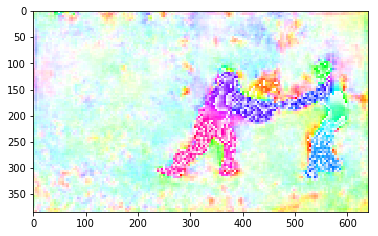

Parsing Arguments
  [0.000s] fp16: False
  [0.001s] fp16_scale: 1024.0
  [0.001s] inference_size: [-1, -1]
  [0.001s] loss: L1Loss
  [0.001s] model: FlowNet2
  [0.001s] model_batchNorm: False
  [0.001s] model_div_flow: 20.0
  [0.001s] number_gpus: 1
  [0.001s] optical_weights: 
  [0.001s] rgb_max: 255.0
  [0.001s] seed: 1
  [0.001s] Operation finished

Building FlowNet2 model
  [3.921s] Number of parameters: 162518834
  [3.921s] Initializing CUDA
  [4.071s] Parallelizing
  [4.075s] Loading weights /mnt/disks/datastorage/weights/FlowNet2.pth.tar
  [4.610s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2.pth.tar (at epoch 0)
  [4.611s] Operation finished



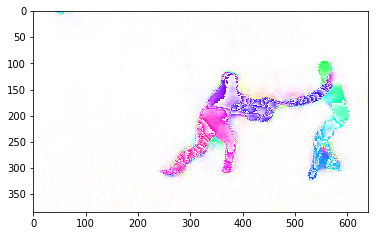

In [7]:
run_optical_flow(vid_frame1, vid_frame2, 'FlowNet2CSS', 'FlowNet2-CSS')
run_optical_flow(vid_frame1, vid_frame2, 'FlowNet2', 'FlowNet2')

Parsing Arguments
  [0.000s] fp16: False
  [0.000s] fp16_scale: 1024.0
  [0.000s] inference_size: [-1, -1]
  [0.000s] loss: L1Loss
  [0.001s] model: FlowNet2CSS
  [0.001s] model_batchNorm: False
  [0.001s] model_div_flow: 20.0
  [0.001s] number_gpus: 1
  [0.001s] optical_weights: 
  [0.001s] rgb_max: 255.0
  [0.001s] seed: 1
  [0.001s] Operation finished

Building FlowNet2CSS model
  [2.711s] Number of parameters: 116565942
  [2.711s] Initializing CUDA
  [2.813s] Parallelizing
  [2.815s] Loading weights /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar
  [3.166s] Loaded checkpoint /mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar (at epoch 0)
  [3.167s] Operation finished



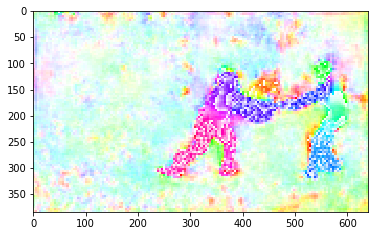

In [8]:
args = parse_args('FlowNet2CSS')
args.optical_weights = '/mnt/disks/datastorage/weights/FlowNet2-CSS.pth.tar'

of = OpticalFlow(args)
output = of.run([vid_frame1, vid_frame2])

display = output.transpose(1, 2, 0)
of.display_flow(display)

In [9]:
from torchvision import transforms
import numpy as np

class AddTransform(object):
    
    def __call__(self, x):
        return x / 255 + 128./255
    
    
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    AddTransform()
])

u = output[0, :, :]
v = output[1, :, :]
vid_tsfm = transform(u)

(array([   76.,    73.,   719., 47530.,   805.,   515.,   128.,   101.,
          127.,   102.]),
 array([0.44391432, 0.4596417 , 0.47536904, 0.4910964 , 0.5068238 ,
        0.5225511 , 0.5382785 , 0.55400586, 0.5697332 , 0.5854606 ,
        0.60118794], dtype=float32),
 <a list of 10 Patch objects>)

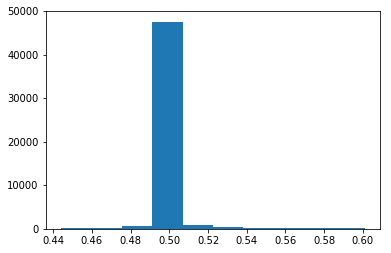

In [10]:
plt.hist(vid_tsfm.numpy().ravel())

In [11]:
u_resize = (cv2.resize(u, (224, 224)) + 128) / 255

(array([   76.,    57.,   667., 47598.,   788.,   539.,   125.,    95.,
          133.,    98.]),
 array([0.44203588, 0.4580962 , 0.47415656, 0.49021688, 0.5062772 ,
        0.52233756, 0.53839785, 0.5544582 , 0.57051855, 0.58657885,
        0.6026392 ], dtype=float32),
 <a list of 10 Patch objects>)

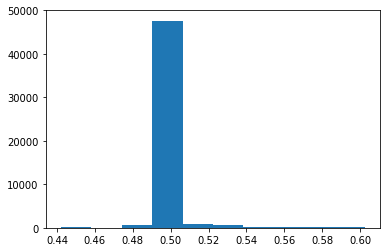

In [12]:
plt.hist(u_resize.ravel())

In [17]:
images = [
    '/mnt/disks/datastorage/videos/flownet2/u/v_Theft_g16_c000004/frame000010.jpg',
    '/mnt/disks/datastorage/videos/flownet2/u/v_Theft_g16_c000004/frame000011.jpg'
]

img_frame1, img_frame2 = load_frames_from_images(images)

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

img_tsfm = transform(img_frame1[:,:,0])

(array([  328.,   928., 47094.,   608.,   753.,    98.,    80.,    65.,
          142.,    80.]),
 array([0.47843137, 0.4882353 , 0.49803922, 0.50784314, 0.5176471 ,
        0.527451  , 0.5372549 , 0.5470588 , 0.5568628 , 0.56666666,
        0.5764706 ], dtype=float32),
 <a list of 10 Patch objects>)

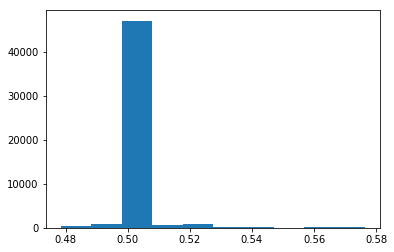

In [18]:
plt.hist(img_tsfm.numpy().ravel())

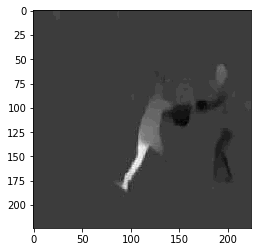

In [19]:
plt.imshow(img_tsfm.squeeze(), cmap='gray')

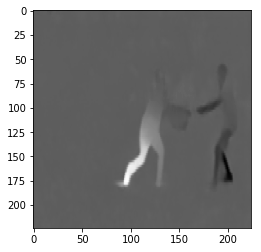

In [20]:
plt.imshow(vid_tsfm.squeeze(), cmap='gray')